# Create the Law Graph (directed graph)

In [1]:
# import the files for the next processing
import pandas as pd
import networkx as nx

# read the files
nodelist = pd.read_csv('./lawnodes.csv', sep=',', header=0)
edgelist = pd.read_csv('./lawedges.csv', sep=',', header=0)

# convert it into a directed graph
di_graph = nx.DiGraph()
di_graph.add_nodes_from(nodelist['Uid'])
di_graph.add_edges_from(list(edgelist.itertuples(index=False)))

# print stats
print('Number of nodes: {:d}'.format(di_graph.number_of_nodes()))
print('Number of edges: {:d}'.format(di_graph.number_of_edges()))

Number of nodes: 43419
Number of edges: 76833


In [3]:
nodelist

,Uid,year,name,type,who,Nart,link
0,urn:nir:stato:decreto.legislativo:1988;539,1988,Decreto legislativo 22 dicembre 539/1988,decreto.legislativo,stato,2,http://www.normattiva.it/uri-res/N2Ls?urn:nir:...
1,urn:nir:stato:decreto.legislativo:1988;509,1988,Decreto legislativo 23 novembre 509/1988,decreto.legislativo,stato,12,http://www.normattiva.it/uri-res/N2Ls?urn:nir:...
2,urn:nir:stato:decreto.legislativo:1988;478,1988,Decreto legislativo 9 novembre 478/1988,decreto.legislativo,stato,1,http://www.normattiva.it/uri-res/N2Ls?urn:nir:...
3,urn:nir:stato:decreto.legislativo:1989;434,1989,Decreto legislativo 28 dicembre 434/1989,decreto.legislativo,stato,5,http://www.normattiva.it/uri-res/N2Ls?urn:nir:...
4,urn:nir:stato:decreto.legislativo:1989;433,1989,Decreto legislativo 28 dicembre 433/1989,decreto.legislativo,stato,7,http://www.normattiva.it/uri-res/N2Ls?urn:nir:...
...,...,...,...,...,...,...,...
1865,urn:nir:stato:decreto.legislativo:2023;027,2023,Decreto Legislativo 23 Febbraio 27/2023,decreto.legislativo,stato,4,http://www.normattiva.it/uri-res/N2Ls?urn:nir:...
1866,urn:nir:stato:decreto.legislativo:2023;026,2023,Decreto Legislativo 7 Marzo 26/2023,decreto.legislativo,stato,3,http://www.normattiva.it/uri-res/N2Ls?urn:nir:...
1867,urn:nir:stato:decreto.legislativo:2023;024,2023,Decreto Legislativo 10 Marzo 24/2023,decreto.legislativo,stato,26,http://www.normattiva.it/uri-res/N2Ls?urn:nir:...
1868,urn:nir:stato:decreto.legislativo:2023;019,2023,Decreto Legislativo 2 Marzo 19/2023,decreto.legislativo,stato,57,http://www.normattiva.it/uri-res/N2Ls?urn:nir:...


In [2]:
edgelist

,source,target
0,urn:nir:stato:decreto.legislativo:1988;539,urn:nir:stato:costituzione:1947-12-27~art76
1,urn:nir:stato:decreto.legislativo:1988;539,urn:nir:stato:costituzione:1947-12-27~art87
2,urn:nir:stato:decreto.legislativo:1988;539,urn:nir:stato:legge:1987-10-09;417
3,urn:nir:stato:decreto.legislativo:1988;539,urn:nir:stato:legge:1973-03-19;32
4,urn:nir:stato:decreto.legislativo:1988;539,urn:nir:stato:legge:1987-10-09;417
...,...,...
129168,urn:nir:stato:decreto.legislativo:2023;018,http://eur-lex.europa.eu/legal-content/IT/TXT/...
129169,urn:nir:stato:decreto.legislativo:2023;018,urn:nir:presidente.repubblica:decreto:1998;392
129170,urn:nir:stato:decreto.legislativo:2023;018,urn:nir:ministero.:decreto:2004;174
129171,urn:nir:stato:decreto.legislativo:2023;018,urn:nir:ministero.:decreto:2004;174


43419


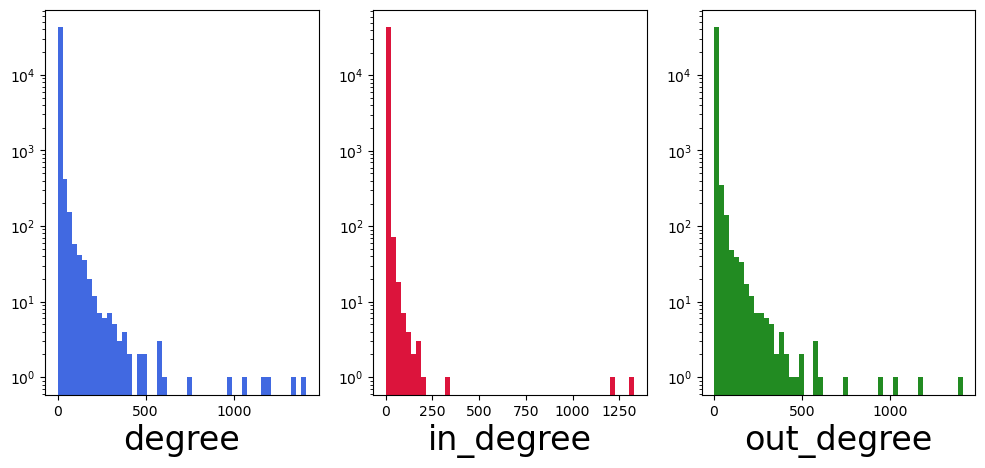

In [13]:
# plot the networks and the stats
import pylab as plt

# get the degree lists of the nodes
degree = di_graph.degree()
in_degree = di_graph.in_degree()
out_degree = di_graph.out_degree()
print(len(in_degree))

# plot the degree distribution
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
ax1.hist(dict(degree).values(), bins=50, color='royalblue')
ax1.set_xlabel('degree', fontsize=24)
ax1.set_yscale('log')
ax2.hist(dict(in_degree).values(), bins=50, color='crimson')
ax2.set_xlabel('in_degree', fontsize=24)
ax2.set_yscale('log')
ax3.hist(dict(out_degree).values(), bins=50, color='forestgreen')
ax3.set_xlabel('out_degree', fontsize=24)
ax3.set_yscale('log')


In [23]:
# get the largest strongly connected component graph as the subgraph
# with the maximum number of nodes in the list of connected
# components
#largest_scc = max(nx.strongly_connected_components(di_graph), key=len)
largest_scc = max([di_graph.subgraph(c).copy() for c in nx.strongly_connected_components(di_graph)], 
                 key=len)

largest_scc.edges()

OutEdgeView([('urn:nir:stato:decreto.legislativo:2003;196', 'urn:nir:stato:decreto.legislativo:2003;196'), ('urn:nir:stato:decreto.legislativo:2003;196', 'urn:nir:stato:decreto.legislativo:1989;322'), ('urn:nir:stato:decreto.legislativo:2003;196', 'urn:nir:stato:decreto.legislativo:2018;101'), ('urn:nir:stato:decreto.legislativo:2018;101', 'urn:nir:stato:decreto.legislativo:1989;322'), ('urn:nir:stato:decreto.legislativo:2018;101', 'urn:nir:stato:decreto.legislativo:2003;196'), ('urn:nir:stato:decreto.legislativo:1989;322', 'urn:nir:stato:decreto.legislativo:2003;196')])

[3, 2, 1]


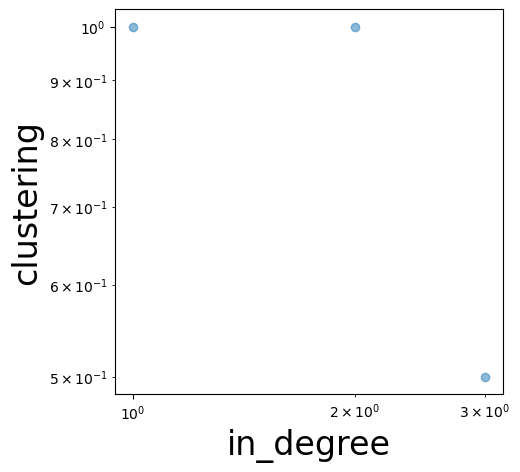

In [12]:
# get the degree list of the nodes belonging to the
# largest connected component
in_degree = list(dict(largest_scc.in_degree()).values())
out_degree = list(dict(largest_scc.out_degree()).values())
print(out_degree)
# get the clustering coefficient list of the nodes belonging to the
# largest connected component
clustering = list(nx.clustering(largest_scc).values())

# plot the relation between the two measures in log scale
# to monitor the type of the graph
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
_ = ax.scatter(out_degree, clustering, marker='o', alpha=0.5)
ax.set_xlabel('in_degree', fontsize=24)
ax.set_ylabel('clustering', fontsize=24)
ax.set_yscale('log')
ax.set_xscale('log')

In [48]:
from time import time as now

# compute the position of the largest component nodes according
# to a spring-layout, aka Kawada-Kamay

tic = now()
pos = nx.spring_layout(largest_cc, 
                       dim=2,
                       iterations=50,
                       seed=42)
toc = now()
print('Elapsed time for spring layout: {:.3f} s'.format(toc - tic))

Elapsed time for spring layout: 4814.257 s


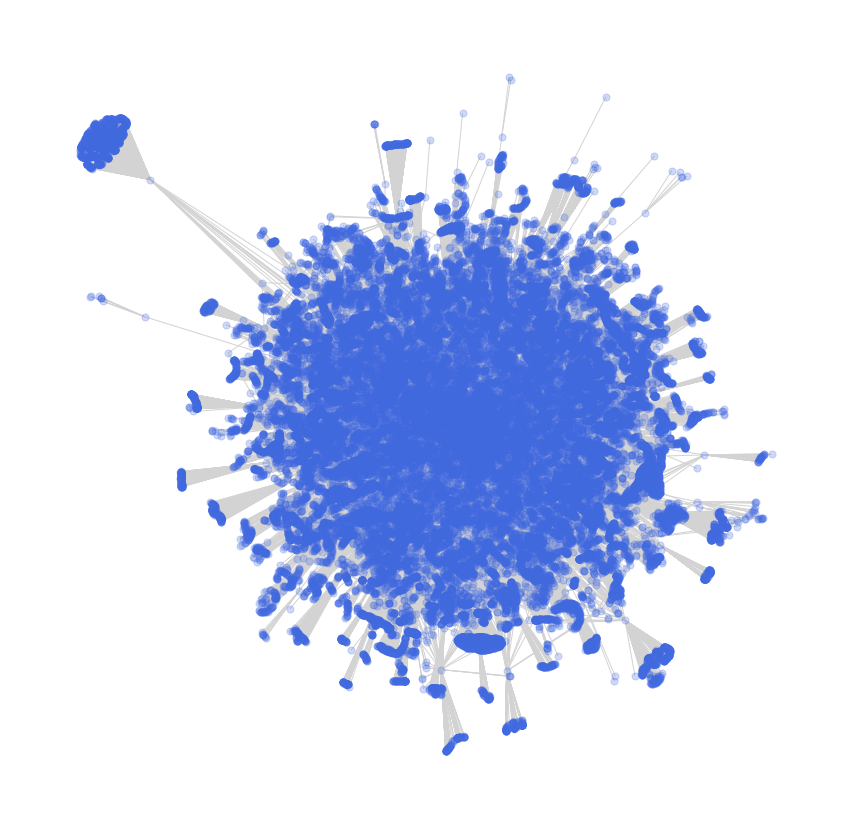

In [49]:
# plot the network
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
nx.draw_networkx_nodes(largest_cc, 
                       pos=pos, ax=ax, 
                       node_shape='o', 
                       node_size=50, 
                       alpha=0.25,
                       node_color='royalblue',
                      )
nx.draw_networkx_edges(largest_cc,
                       pos=pos, ax=ax,
                       edge_color='lightgray',
                       alpha=1.,
                       width=1.,
                      )
_ = ax.axis('off')

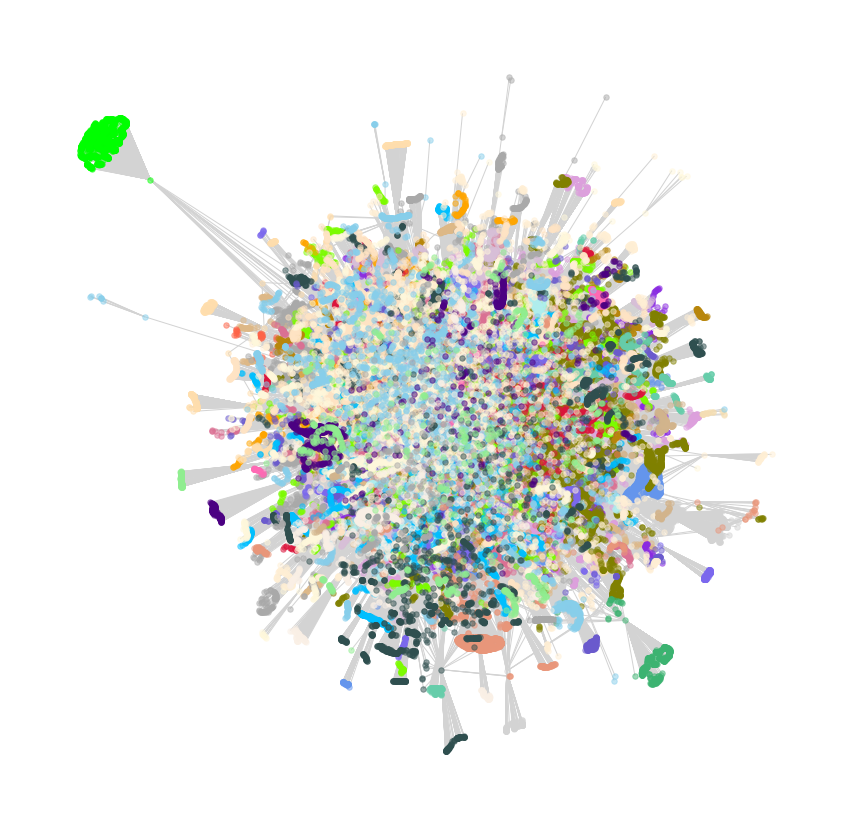

In [50]:
import numpy as np
import matplotlib.colors as mcolors

# plot the network
# NOTE: we color the nodes according to the community

colors = list(mcolors.CSS4_COLORS.keys())
np.random.shuffle(colors)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

nx.draw_networkx_edges(largest_cc,
                       pos=pos, ax=ax,
                       edge_color='lightgray',
                       alpha=1.,
                       width=1.,
                      )

for com, color in zip(community, colors):
    coords = np.vstack([pos[x] for x in com])
    ax.scatter(*zip(*coords), color=color, marker='o', s=30, alpha=0.5)
    
_ = ax.axis('off')

In [9]:
# get the list of connected components
for i, c in enumerate(nx.connected_components(graph)):
    print('Connected component {:d}: {:d} nodes ({:.3f}%)'.format(i+1, len(c), len(c)/graph.number_of_nodes() * 100))
    if i > 0:
        pprint(c)

Connected component 1: 43361 nodes (99.866%)
Connected component 2: 2 nodes (0.005%)
{'urn:nir:stato:decreto.legislativo:1992;534',
 'urn:nir:stato:decreto.legislativo:2011-07-07;122'}
Connected component 3: 2 nodes (0.005%)
{'urn:nir:stato:decreto.legislativo:1992;533',
 'urn:nir:stato:decreto.legislativo:2011-07-07;126'}
Connected component 4: 2 nodes (0.005%)
{'urn:nir:presidente.repubblica:decreto:2001-05-18;310',
 'urn:nir:stato:decreto.legislativo:1992;464'}
Connected component 5: 2 nodes (0.005%)
{'urn:nir:stato:decreto.legislativo:1992;120',
 'urn:nir:stato:decreto.legislativo:2007-03-02;50'}
Connected component 6: 1 nodes (0.002%)
{'urn:nir:stato:decreto.legislativo:1992;117'}
Connected component 7: 2 nodes (0.005%)
{'urn:nir:stato:decreto.legislativo:1992;77',
 'urn:nir:stato:decreto.legislativo:2002-02-02;25'}
Connected component 8: 2 nodes (0.005%)
{'urn:nir:stato:decreto.legislativo:1993;117',
 'urn:nir:stato:decreto.legislativo:2000-10-05;298'}
Connected component 9: 2 no